In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import nltk
import math
import numpy as np

In [2]:
### read data
data = pd.read_csv('/Users/mac/Dropbox/Git/dorahacktradegeneration/data/bitcoin_201810.csv')
sentences = data['title'].tolist()

In [3]:
## label data
analyzer = SentimentIntensityAnalyzer()
store = {
        'time' :[],
        'headline': [],
        'compound': [],
        'neg': [],
        'neu': [],
        'pos': []
        }
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    store['headline'].append(sentence)
    store['compound'].append(vs['compound'])
    store['neg'].append(vs['neg'])
    store['neu'].append(vs['neu'])
    store['pos'].append(vs['pos'])

for t in data['CreatedUtc']:
    store['time'].append(t)
    
df = pd.DataFrame.from_records(store)
df.head()    
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()    

,compound,headline,neg,neu,pos,time,label
0,0.0000,Overall Ledgerium is a company that brings Blo...,0.0,1.0,0.0,01/10/2018 00:10:35,0
1,0.0000,Amateur Cryptojackers and Apple Macs Emerge as...,0.0,1.0,0.0,01/10/2018 00:12:28,0
2,0.4588,Arbitrage trading and how to benefit from it,0.0,0.7,0.3,01/10/2018 00:18:15,1
3,0.0000,Bitcoin Girls [Music Video],0.0,1.0,0.0,01/10/2018 00:22:00,0
4,0.0000,How Binance Decentralized Exchange Launch in 2...,0.0,1.0,0.0,01/10/2018 00:28:31,0


In [4]:
print("Positive headlines:\n")
print(list(df[df['label'] == 1].headline)[:5])

print("\nNegative headlines:\n")
print(list(df[df['label'] == -1].headline)[:5])


print(df.label.value_counts())
print(df.label.value_counts(normalize=True) * 100)


Positive headlines:

['Arbitrage trading and how to benefit from it', 'Free btc', 'telegram bitcoin faucet i earn 20$ in 3 days legit newest 2018 im not lying', 'KIẾM FREE BTC Daily Bitcoin Bonus up to 4 BTC shared each day', "I'm trying to convince this restaurant to start accepting bitcoin! Help me out!"]

Negative headlines:

['Many big people criticize Bitcoin without knowing it properly.', 'Why did bitcoin fail?', "Shower thought: Cash 2.0 - GOVs wanted to get rid of cash anyway. Isn't Bitcoin a good way to achieve that? Nudge nudge, say no more.", 'Google Fraud Fighter Explains Risks Involved in Boasting About Owning Bitcoin', "When certain failed fork coins attempt to keep up with Bitcoin's 92% hashrate (and price)"]
 0    2942
 1    1419
-1     658
Name: label, dtype: int64
 0    58.617254
 1    28.272564
-1    13.110181
Name: label, dtype: float64


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'Percentage')

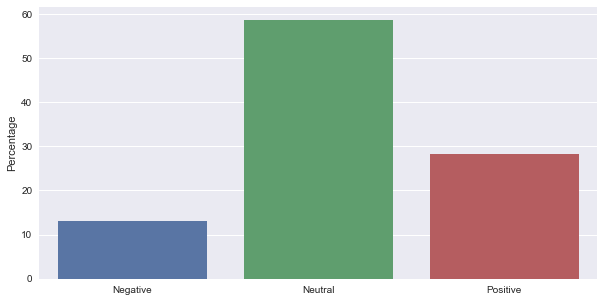

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

In [6]:
# tokenize words
from nltk.tokenize import word_tokenize, RegexpTokenizer
example = "This is an example sentence! However, it isn't a very informative one"
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

# get stop_words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [7]:
# positive words 
# We can grab all of the positive label headlines 
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('bitcoin', 600),
 ('btc', 159),
 ('crypto', 152),
 ('free', 126),
 ('best', 86),
 ('cryptocurrency', 80),
 ('get', 78),
 ('help', 74),
 ('blockchain', 73),
 ('earn', 70),
 ('exchange', 59),
 ('new', 59),
 ('like', 47),
 ('mining', 45),
 ('one', 42),
 ('good', 41),
 ('wallet', 41),
 ('trading', 40),
 ('pivot', 40),
 ('amp', 40)]

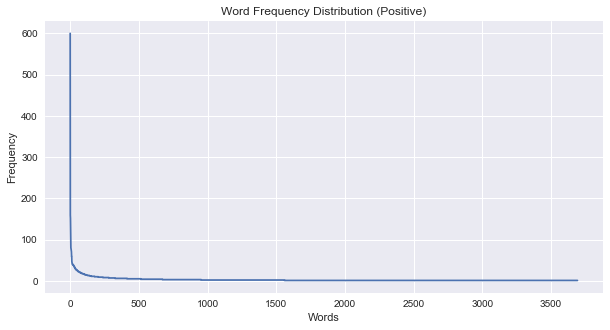

In [8]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

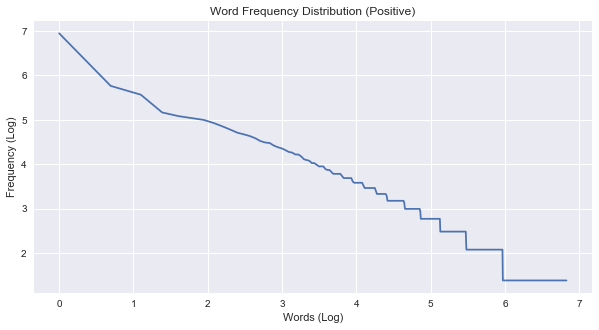

In [9]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)

In [10]:
# negative words
df2 = df[['headline', 'label']]

neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('bitcoin', 341),
 ('crypto', 73),
 ('scam', 46),
 ('btc', 44),
 ('price', 34),
 ('cryptocurrency', 34),
 ('money', 29),
 ('tether', 28),
 ('new', 27),
 ('people', 22),
 ('blockchain', 22),
 ('exchange', 21),
 ('block', 21),
 ('mining', 21),
 ('market', 21),
 ('amp', 19),
 ('time', 19),
 ('could', 18),
 ('one', 18),
 ('news', 18)]

Text(0.5,1,'Word Frequency Distribution (Negative)')

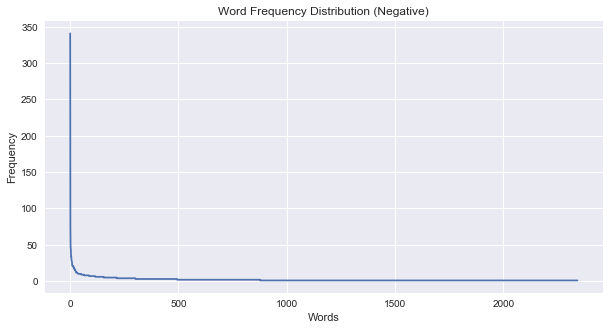

In [11]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")

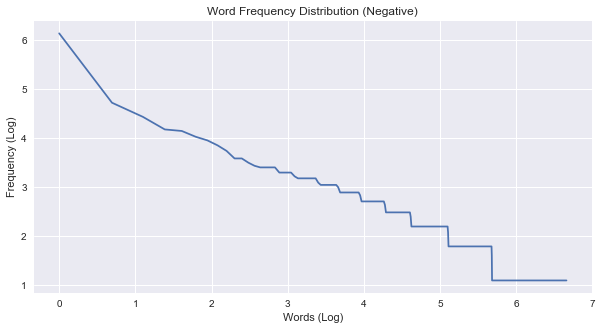

In [12]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)

In [13]:
####  time distritution
df['time'] = pd.to_datetime(df['time'],dayfirst=True)
df.index= df['time']

new_data = {
    'time': [],
    'positive_count' : [],
    'negative_count' : [],
    'neutral_count' :[]
}


In [14]:
time_day = np.unique(df.index.strftime("%Y-%m-%d"))

for i in range(len(time_day)):
    dd = df[df.index.strftime("%Y-%m-%d")==time_day[i]]
    new_data['time'].append(time_day[i])
    new_data['positive_count'].append(sum(dd['label'] == 1))
    new_data['neutral_count'].append(sum(dd['label'] == 0))
    new_data['negative_count'].append(sum(dd['label'] == -1))

df_day = pd.DataFrame.from_records(new_data)
df_day['ratio'] = df_day['positive_count'] /(df_day['positive_count'] + df_day['negative_count'])
df_day['volume'] = df_day['positive_count'] + df_day['negative_count']


In [16]:
df_day

,negative_count,neutral_count,positive_count,time,ratio,volume
0,25,154,85,2018-10-01,0.772727,110
1,35,155,85,2018-10-02,0.708333,120
2,42,163,78,2018-10-03,0.650000,120
3,35,150,88,2018-10-04,0.715447,123
4,36,153,75,2018-10-05,0.675676,111
5,22,112,42,2018-10-06,0.656250,64
6,16,105,44,2018-10-07,0.733333,60
7,29,137,69,2018-10-08,0.704082,98
8,28,153,81,2018-10-09,0.743119,109
9,47,142,68,2018-10-10,0.591304,115
